In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Read and clean data

In [23]:
data_raw = pd.read_csv('IPIP-FFM-data-8Nov2018/data-clean-means.csv')

In [24]:
data=data_raw.copy()

In [25]:
data.head()

,EXT,EST,AGR,CSN,OPN
0,1.6,-0.6,0.9,0.2,1.5
1,-1.0,-0.5,1.4,0.7,0.5
2,-0.5,-0.4,1.2,0.4,1.1
3,-0.4,-0.1,0.8,-0.5,0.9
4,0.2,-0.8,0.8,0.7,1.4


### KMeans Clustering

In [5]:
from sklearn.cluster import KMeans

In [26]:
kdata = data.copy()

In [27]:
kmeans = KMeans(n_clusters=12)
k_fit = kmeans.fit(kdata)

In [28]:
predictions = k_fit.labels_
kdata['Clusters'] = predictions

In [29]:
kdata.head()

,EXT,EST,AGR,CSN,OPN,Clusters
0,1.6,-0.6,0.9,0.2,1.5,1
1,-1.0,-0.5,1.4,0.7,0.5,11
2,-0.5,-0.4,1.2,0.4,1.1,7
3,-0.4,-0.1,0.8,-0.5,0.9,7
4,0.2,-0.8,0.8,0.7,1.4,11


In [32]:
kdata.to_csv('IPIP-FFM-data-8Nov2018/kmeans_py.csv', index=False)

               EXT       EST       AGR       CSN       OPN
Clusters                                                  
0        -0.220122  0.197981  0.587349  0.219619  0.041162
1         0.979341 -0.527239  1.177377 -0.186288  1.087007
2        -1.066728  0.866623 -0.384975 -0.152941  0.721116
3         0.540430 -0.462589 -0.168841  0.350870  1.180971
4        -0.962347  1.086473  0.987172 -0.362679  0.895744
5        -0.839991  0.751783  0.939560  0.932499  1.028929
6         0.710570  0.443633  1.253497  0.881637  1.074206
7        -0.636666 -0.361516  0.834784 -0.229879  1.126509
8        -1.074003 -0.581958 -0.377503  0.695699  1.015749
9         1.031396 -1.035412  1.345527  1.120847  1.230640
10        0.564862  0.920037  0.940981 -0.336162  1.168177
11       -0.330489 -0.735822  1.106409  1.007452  0.902785


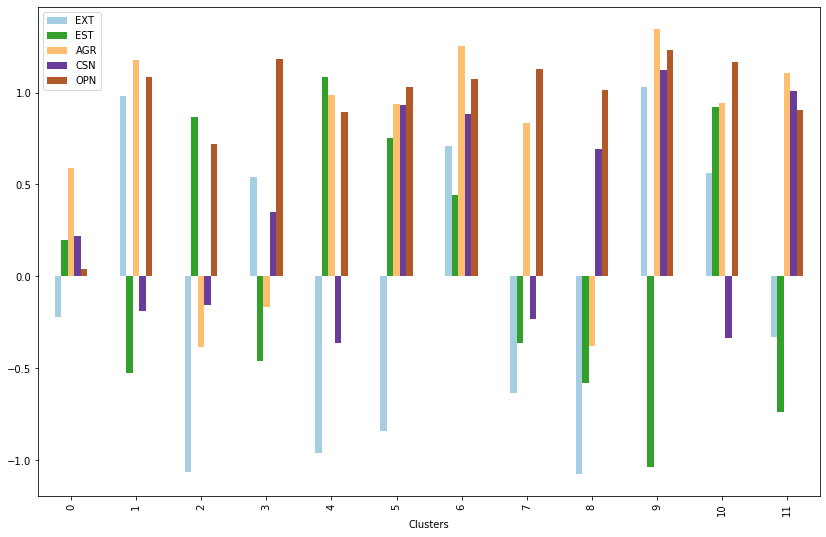

In [31]:
table = kdata.groupby('Clusters')["EXT", "EST", "AGR", "CSN", "OPN"].mean()
print(table)

table.plot(figsize=(14,9), kind="bar", colormap='Paired')

In [33]:
# Standardizing results
total_scores = kdata[["EXT", "EST", "AGR", "CSN", "OPN"]]

total_scores = total_scores.apply(lambda x: (x-x.mean())/x.std(), axis = 0)

               EXT       EST       AGR       CSN       OPN
clusters                                                  
0        -0.147405  0.135167 -0.233905 -0.166626 -1.452608
1         1.168736 -0.707568  0.567590 -0.715801  0.239737
2        -1.076365  0.912154 -1.554712 -0.670685 -0.352334
3         0.687129 -0.632442 -1.261115  0.010951  0.391786
4        -0.961831  1.167628  0.309215 -0.954451 -0.069757
5        -0.827573  0.778706  0.244539  0.797871  0.145757
6         0.873820  0.420624  0.670991  0.729056  0.219022
7        -0.604469 -0.514991  0.102211 -0.774778  0.303657
8        -1.084348 -0.771153 -1.544561  0.477490  0.124431
9         1.225854 -1.298085  0.796005  1.052698  0.472158
10        0.713938  0.974223  0.246469 -0.918574  0.371083
11       -0.268509 -0.949949  0.471186  0.899280 -0.058364


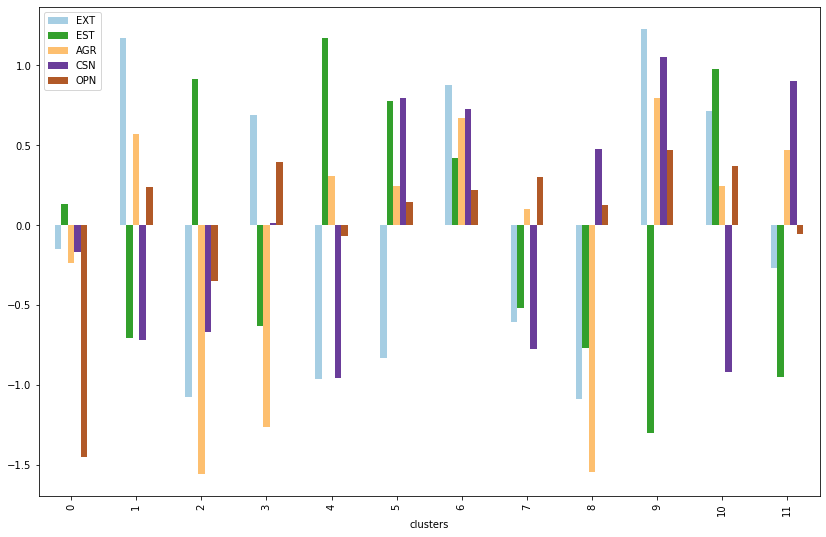

In [34]:
total_scores["clusters"] = kdata["Clusters"]
table = total_scores.groupby('clusters')["EXT", "EST", "AGR", "CSN", "OPN"].mean()
print(table)

table.plot(figsize=(14,9), kind="bar", colormap='Paired')

### Hierarchical Clustering

In [ ]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc

In [ ]:
hdata = data.copy()

In [ ]:
plt.figure(figsize=(10, 7))
plt.title("Customer Dendograms")
dend = shc.dendrogram(shc.linkage(hdata, method='ward'))

In [ ]:
cluster = AgglomerativeClustering(n_clusters=12, affinity='euclidean', linkage='ward')
cluster.fit_predict(hdata)